In [ ]:
!pip install pandas
!pip install matplotlib
!pip install tensorflow

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import activations
from keras import layers,models,Sequential

2025-02-16 16:20:22.320620: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-16 16:20:22.331251: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-16 16:20:22.430011: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-16 16:20:22.521237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739697622.602738    1209 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739697622.62

In [3]:
# Path to the file
file_path = './output/frame_trajectory.txt'

# Read the space-separated txt file into a DataFrame
df = pd.read_table(file_path, delim_whitespace=True, header=None, 
                   names=['timestamp', 'x', 'y', 'z', 'qx', 'qy', 'qz', 'qw'])

# Print the first 10 values of x, y, z columns
print(df[['timestamp','x', 'y', 'z']].head(3))


   timestamp         x         y         z
0   0.433767 -0.000000 -0.000000 -0.000000
1   0.533867  0.000237 -0.001058  0.012539
2   0.567234  0.000678 -0.001695  0.032516


/tmp/ipykernel_1209/829478411.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_table(file_path, delim_whitespace=True, header=None,


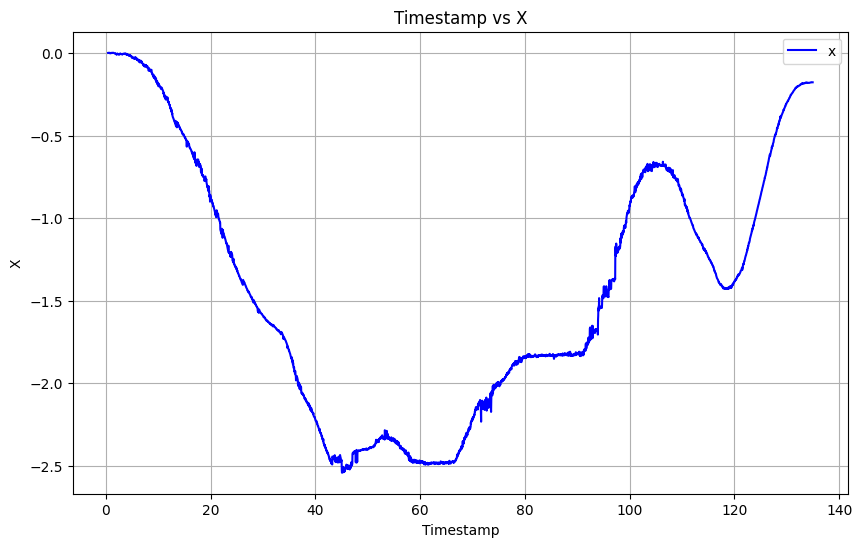

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['x'], label='x', color='b')
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('Timestamp vs X')
plt.grid(True)
plt.legend()
plt.show()

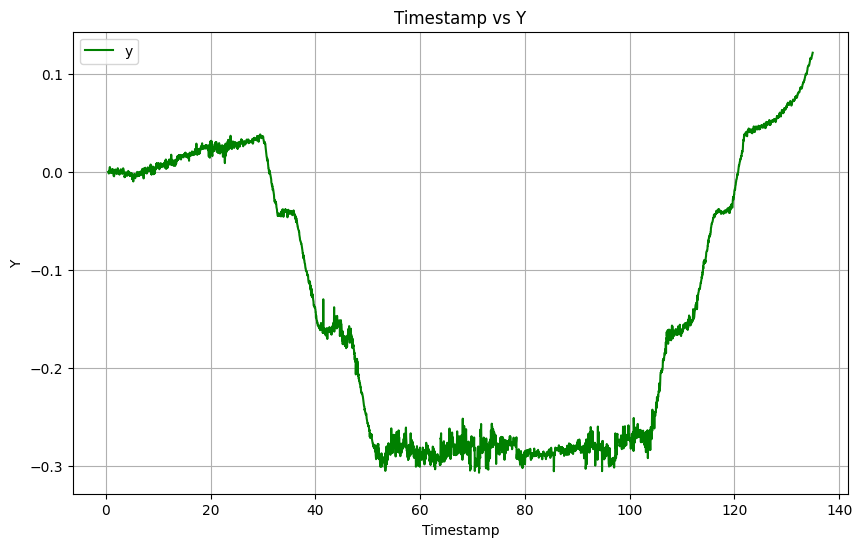

In [5]:
# Plot timestamp vs y
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['y'], label='y', color='g')
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('Timestamp vs Y')
plt.grid(True)
plt.legend()
plt.show()


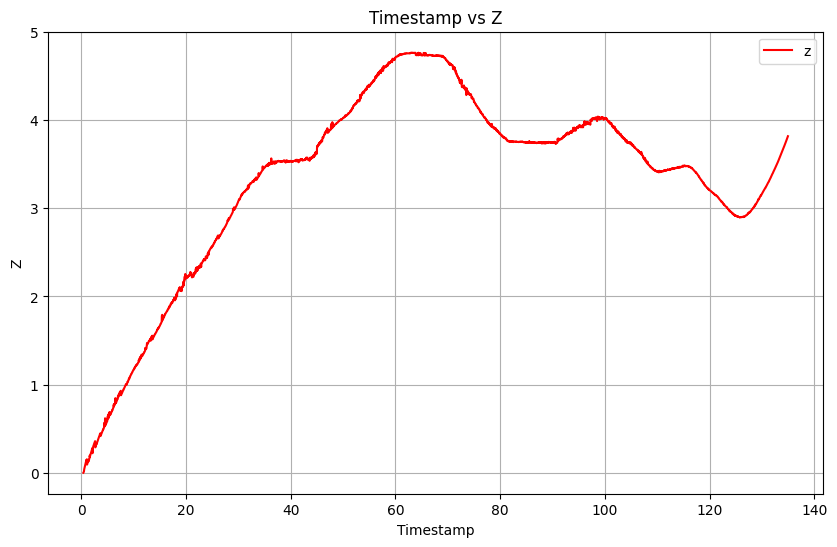

In [6]:
# Plot timestamp vs z
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['z'], label='z', color='r')
plt.xlabel('Timestamp')
plt.ylabel('Z')
plt.title('Timestamp vs Z')
plt.grid(True)
plt.legend()
plt.show()


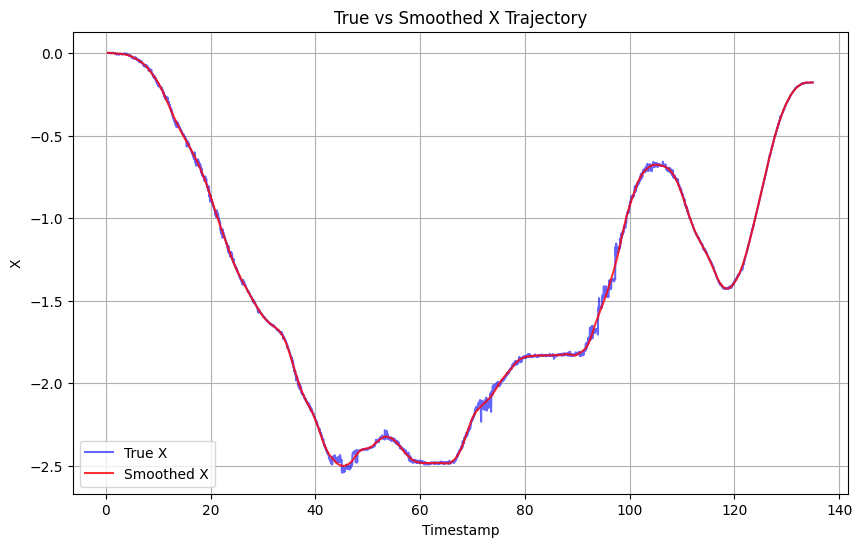

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assuming you have your DataFrame df with a column 'x' for the trajectory data
x_values = df['x'].values  # Replace with your actual 'x' values from DataFrame

# Apply the Savitzky-Golay filter to smooth the data
# window_length is the size of the filter window (it should be an odd number)
# polyorder is the order of the polynomial used to fit the filter
# MUST: config window_length and polyorder manually, ask gpt how that work
smoothed_x = savgol_filter(x_values, window_length=256, polyorder=4)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], x_values, label='True X', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_x, label='Smoothed X', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('X')
plt.title('True vs Smoothed X Trajectory')
plt.legend()
plt.grid(True)
plt.show()


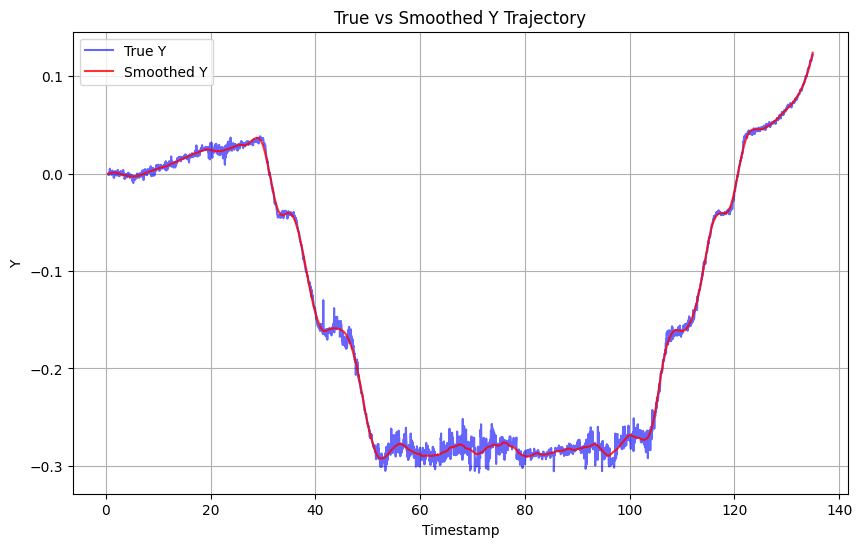

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


y_values = df['y'].values
smoothed_y = savgol_filter(y_values, window_length=256+8, polyorder=4)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], y_values, label='True Y', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_y, label='Smoothed Y', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('Y')
plt.title('True vs Smoothed Y Trajectory')
plt.legend()
plt.grid(True)
plt.show()


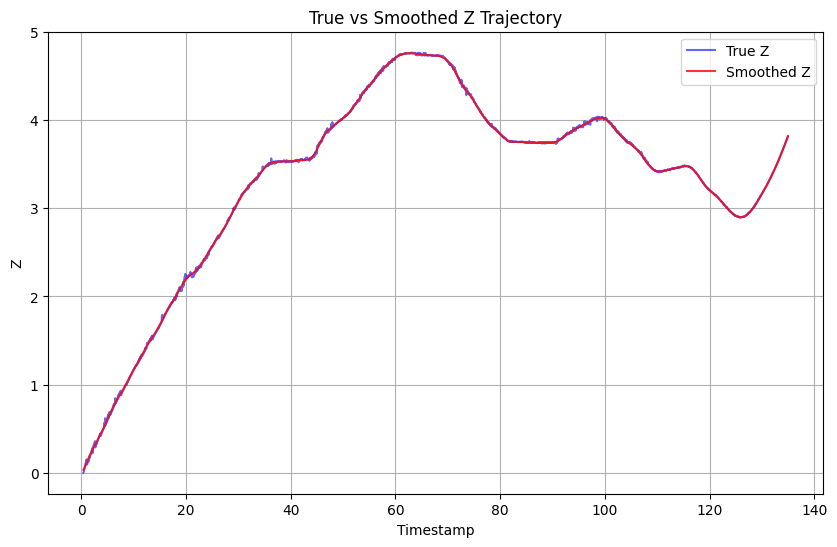

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

z_values = df['z'].values
smoothed_z = savgol_filter(z_values, window_length=256, polyorder=6)

# Plot the original (true) data vs. the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], z_values, label='True Z', color='b', alpha=0.6)  # Original data
plt.plot(df['timestamp'], smoothed_z, label='Smoothed Z', color='r', alpha=0.8)  # Smoothed data
plt.xlabel('Timestamp')
plt.ylabel('Z')
plt.title('True vs Smoothed Z Trajectory')
plt.legend()
plt.grid(True)
plt.show()
  

In [11]:
# Create a DataFrame with the smoothed values
smoothed_df = pd.DataFrame({
    'timestamp': df['timestamp'],
    'x': smoothed_x,
    'y': smoothed_y,
    'z': smoothed_z,
    'qx': df['qx'],
    'qy': df['qy'],
    'qz': df['qz'],
    'qw': df['qw']
})

# Export to smoothed_trajectory.txt
output_path = './output/smoothed_trajectory.txt'
smoothed_df.to_csv(output_path, sep=' ', index=False, header=False)